In [26]:
import pickle as cPickle
import gzip

import numpy as np
%pylab inline 
import matplotlib.pyplot as pl

from PIL import Image
import PIL.ImageOps 

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'sign']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [27]:
dirPath = 'ASL/signs/'
import os
signs = ''
trainingX = []
trainingY = []
training = []
for f in os.listdir(dirPath):
    fname = dirPath+f
    base=os.path.basename(fname)
    sign = os.path.splitext(base)[0]
    
    im = Image.open(fname)
    im = PIL.ImageOps.invert(im)
    im = im.convert('1')
    im = im.crop((0, 0, 250, 250))
#    im = im.resize((100,100),Image.ANTIALIAS)
    (width, height) = im.size
    # print(im.size)
    imgB = np.asarray(im).reshape(-1)
    #imgB
    #pl.imshow(imgB,cmap='Greys')  
    trainingX.append(imgB)
    trainingY.append(sign)
#     training.append((np.array(sign),np.array(imgB)))
    signs += sign
    pass
signs = sorted(signs)
# print(signs)
# print(len(signs))
signs.index('z')
print(width,height)
# for im in imgB:
#     print(im)
# print(imgB)
# training = np.array(training)     
training.append(trainingX)
training.append(trainingY)
# print(training[1][0:5])
# training.T
# training = np.matrix(trainingX,trainingY)

250 250


(251, 250)
0


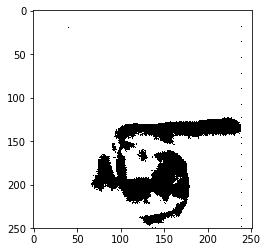

In [28]:
im = Image.open('ASL/signs/z.jpg')
im = PIL.ImageOps.invert(im)
im = im.convert('1')
# im.save('result.png')
(width, height) = im.size
im.size
print(im.size)
px=im.getpixel((60, 95))
print(px)

imgB = np.asarray(im)
imgB
pl.imshow(imgB,cmap='Greys')

In [29]:
def load_data():
    '''
    traning_data - массив из 50000 тренировочных примеров, 
    0 - элемент содержит массив массивов бит изображений
    1 - соответствующий картинке номер
    validation_data и test_data аналогичные, но содержат 
    по 10000 значений
    '''
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = cPickle.load(f,encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

In [30]:
def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [31]:
def load_data_wrapper():
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    #print(training_inputs[0])
    #print(training_results[0])
    training_data = zip(training_inputs, training_results)
    #print(training_data[0])
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_zipped = zip(test_inputs, te_d[1])
    # print(training_data, validation_data, test_zipped)
    return (training_data, validation_data,test_zipped)

In [32]:
# training, validation, test=load_data_wrapper()


In [33]:
#trd = list(training)

In [34]:
#print(len(trd))
#print(trd[1:10][1])
#nerobit = trd[0:2]
#print(len(nerobit))
#print(nerobit[0][0])

#mini_batches =[trd[0:10]
#                for k in range(0, n, 10)]

In [35]:
def vectorized_result(j,size):
    e = np.zeros((26, size))
    print('j:',j)
    print('size',size)
    cnt=0
    for i in j:
#         print('i:',i,'j:',j)
#         print('i:',i)
        idx = signs.index(i)
#         print('i:',idx)
        e[idx][cnt] = 1.0
        cnt+=1
    return e

j: ['z', 's', 'd', 'm', 'n']
size 5


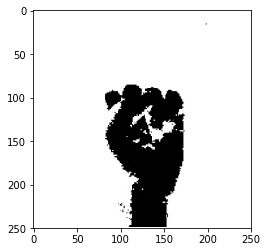

In [36]:
# training, validation, test = load_data()
# print(training[0][1])
# print(training[0][0])
# print(training)
# print(training[0][0])
# print(training)
Xdisplay = np.reshape(training[0][1],(250,250))
# print(Xdisplay)
# print(training.__class__.__name__)
# print(training[1][0:3])
y = vectorized_result(training[1][0:5],5)
# print(y)
#print(training[1][0:10])
pl.imshow(Xdisplay,cmap='Greys')
# pl.xlabel(('Number %d' % training[1][1]))  
X = np.float32(training[0][0:5])#, dtype('float32')

In [37]:
# print(X.T.shape)
# b = np.dot(X.T,5)
# for ln in b:
#     for el in ln:
#         if el >0:
#             print(el)

In [38]:
#testInput = np.arange(-6,6,0.01)
#plot(testInput, sigmoid(testInput), linewidth= 2)
#grid(1)

In [39]:
#net = Neural_Network()

In [40]:
#net.forward(X)

In [41]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 250*250
        self.outputLayerSize = 26
        self.hiddenLayerSize = 20
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        # print (self.W1.shape,self.W2.shape)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        # print ('z2',self.z2)
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        # print (J)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        # print('YHat',self.yHat)
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        # print('delta',delta3)
        # print('delta.shape',delta3.shape)
        # print('a2',self.a2.shape)
        dJdW2 = np.dot(self.a2.T, delta3)
        # print('Djdw',dJdW2)
        
        delta2 = np.float32(np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2))
        # print('delta2', delta2)
        # print('delta2.shape:',delta2.shape)
        # print('X.T.shape:',X.T.shape)

        dJdW1 = np.dot(X.T, delta2)
#         for ln in dJdW1:
#             for el in ln:
#                 if el >0:
#                     print(el)
        # dJdW1 = np.dot(2, delta2)
        # dJdW1 = np.dot(X.T, 2)
        # print (dJdW1,dJdW2)
        # print('sigmoid.z2',self.sigmoidPrime(self.z2))
        # print('W2.T',self.W2.T.shape)
        # print('delta2',delta2.shape)
        # print('X.T',X.T.shape)
        return dJdW1, dJdW2
    
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [42]:
NN = Neural_Network()

In [43]:
NN.forward(X)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


array([[  8.06941426e-01,   8.60089358e-01,   9.93926508e-01,
          9.99890826e-01,   5.47248336e-01,   4.57749881e-01,
          5.97876062e-01,   9.30655172e-01,   3.40252725e-02,
          8.97901662e-01,   2.55162176e-02,   9.84832346e-01,
          1.91576937e-04,   1.26965096e-02,   4.12137431e-01,
          7.73388230e-01,   8.25470651e-01,   4.15866459e-02,
          4.44269897e-01,   3.13991097e-01,   7.11189664e-01,
          1.73998853e-02,   3.17591122e-02,   3.03736519e-02,
          9.59761275e-01,   8.52277274e-01],
       [  9.76092338e-01,   8.49113006e-01,   5.65820976e-01,
          9.98796983e-01,   4.85418445e-01,   6.86955721e-02,
          5.10524144e-01,   9.21470397e-01,   1.06951200e-02,
          9.88479873e-01,   1.77705520e-03,   8.95716576e-01,
          2.07326881e-06,   2.35344431e-01,   1.40041302e-01,
          9.67366549e-01,   9.51936096e-01,   1.37579911e-02,
          8.68457920e-01,   9.81342107e-02,   5.74979802e-01,
          1.82782337e-01,

In [44]:
cost1 = NN.costFunction(X,y.T)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


In [45]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y.T)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


In [46]:
print('dJdW1',dJdW1,'dJdW2',dJdW2)

dJdW1 [[ nan  nan  nan ...,  nan  nan   0.]
 [ nan  nan  nan ...,  nan  nan   0.]
 [ nan  nan  nan ...,  nan  nan   0.]
 ..., 
 [ nan  nan  nan ...,  nan  nan   0.]
 [ nan  nan  nan ...,  nan  nan   0.]
 [ nan  nan  nan ...,  nan  nan   0.]] dJdW2 [[  3.13963428e-01   3.77368724e-01   3.26683999e-01   3.89116676e-02
    5.09102274e-01   2.39524641e-01   3.87639083e-01   1.81952545e-01
    1.24985020e-03   2.22775337e-01   7.30084904e-04   3.04265728e-01
   -1.49819640e-05   3.38853376e-02   3.90710191e-01   1.98770728e-01
    3.26207349e-01   5.49006545e-02   2.86172377e-01   7.71193779e-02
    5.79667338e-01   9.48804260e-02   3.10075092e-03   1.10101267e-01
    4.31123735e-01   6.77191210e-02]
 [  1.13222586e-02   1.00104289e-01   3.66134494e-02  -1.54075520e-05
    8.37216157e-02   1.36193669e-04   2.03294179e-02   9.86952059e-02
    2.20999229e-02   3.29890409e-02   3.74835673e-04   1.45446327e-01
    4.03432393e-06   1.47334302e-01   1.96855742e-02   2.77394690e-02
    1.85597792e

In [47]:
costarr=[]
for i in range(0,50):
    cost = NN.costFunction(X,y.T)
    costarr.append(cost)
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y.T)
    scalar = 2
    NN.W1 = NN.W1 - scalar*dJdW1
    NN.W2 = NN.W2 - scalar*dJdW2
print(costarr)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


[27.051726682996172, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [48]:
result=NN.forward(X)
result=np.around(result, decimals = 2)
print(result)
# print(y.T)
yarr=training[1][0:5]
res=[np.argmax(i) for i in  result]
# print('res',res)
print([signs[sign] for sign in res])
print('yarr',yarr)
# print(list(zip(res,yarr)))
sum(int(x == y) for (x, y) in list(zip(res,yarr)))

[[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]]
['a', 'a', 'a', 'a', 'a']
yarr ['z', 's', 'd', 'm', 'n']


0

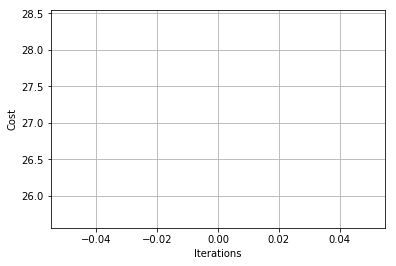

In [49]:
plot(costarr)
grid(1)
xlabel('Iterations')
ylabel('Cost')